MANUAL IMPLEMENTATION

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from UCI Machine Learning Repository (via a direct link on GitHub)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# The dataset from UCI does not have a header row and column names.
# Let's define the column names based on the dataset description.
# The first column is the ID, the second is the diagnosis (M=malignant, B=benign),
# and the remaining 30 columns are the features.

# Define column names - first two are ID and Diagnosis, remaining are features
feature_names = [f'feature_{i}' for i in range(1, 31)]
column_names = ['id', 'diagnosis'] + feature_names
df.columns = column_names

# Separate dependent and independent variables
y = df['diagnosis']
X = df.drop(['id', 'diagnosis'], axis = 1)

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the first few rows and the column names to verify
display(df.head())
display(df.columns)

,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Index(['id', 'diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30'],
      dtype='object')

In [ ]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9447236180904522, 0.9298245614035088]
3 : [0.9522613065326633, 0.9181286549707602]
4 : [0.9447236180904522, 0.9298245614035088]
5 : [0.9396984924623115, 0.9473684210526315]
6 : [0.9371859296482412, 0.9473684210526315]
7 : [0.9371859296482412, 0.9532163742690059]
8 : [0.9321608040201005, 0.9532163742690059]
9 : [0.9321608040201005, 0.9590643274853801]
10 : [0.9321608040201005, 0.9649122807017544]
11 : [0.9346733668341709, 0.9649122807017544]
12 : [0.9321608040201005, 0.9649122807017544]
13 : [0.9296482412060302, 0.9649122807017544]
14 : [0.9296482412060302, 0.9649122807017544]
15 : [0.9321608040201005, 0.9649122807017544]
16 : [0.9271356783919598, 0.9649122807017544]
17 : [0.9321608040201005, 0.9649122807017544]
18 : [0.9221105527638191, 0.9649122807017544]
19 : [0.9246231155778895, 0.9649122807017544]
20 : [0.9170854271356784, 0.9649122807017544]


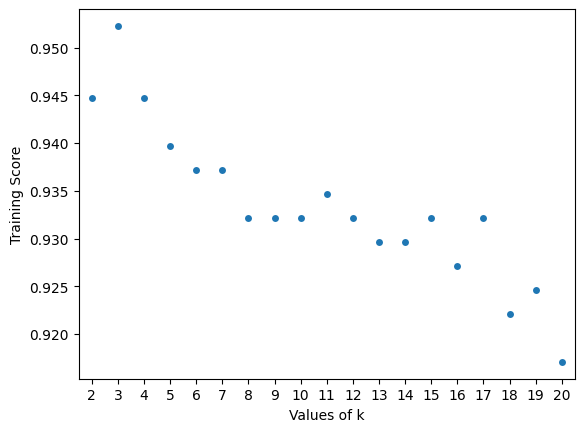

In [ ]:
ax = sns.stripplot(x=K, y=training)  # Use x and y as keyword arguments
ax.set(xlabel='Values of k', ylabel='Training Score')
plt.show()

INBUILT METHOD

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [ ]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []

    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

In [ ]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [ ]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A
